In [1]:
import sys

sys.path.append('../')
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# convert .jpg

In [1126]:
from AquaML.common.ImageTool import save_from_array

imgs = np.load('Square.npy')
save_from_array(imgs, 'Dataset/label2')

# Gray label

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x7FCB90784940>


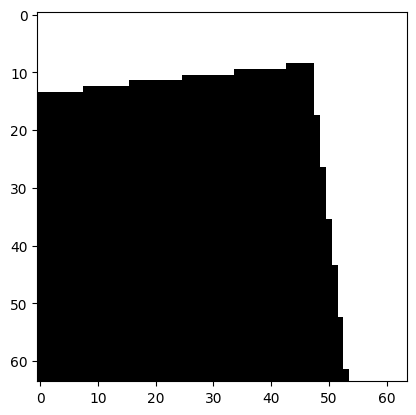

In [2]:
random_index = np.random.uniform(0, 100000, 1)
random_index = int(random_index)
random_index = 23198
img_label1 = Image.open('Dataset/label/{}.jpg'.format(str(random_index)))
print(img_label1)
img_label1_gray = np.array(img_label1)[:, :, 2]/255
img_label1_gray = np.where(img_label1_gray < 0.5, 0, 1)
plt.imshow(img_label1_gray, cmap='gray')

# process land zone

## pencil filter

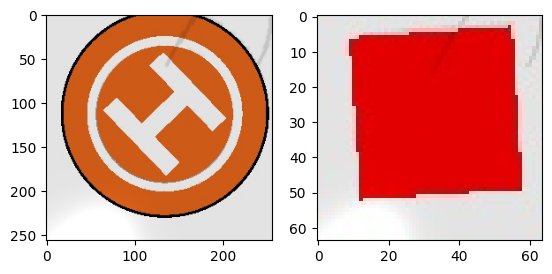

In [3]:
from AquaML.tool.CVFilter import PencilFilter

fil = PencilFilter(dilatation_size=2)
random_index = np.random.uniform(0, 30000, 1)
random_index = int(random_index)
# random_index = 23198
img_land = Image.open('Dataset/land2/{}.jpg'.format(random_index))
img_label = Image.open('Dataset/label2/{}.jpg'.format(str(random_index)))

img_label = np.array(img_label)
img_land = np.array(img_land)
# img_land1 = np.where(img_land1 > 200, 0, 255)
# res = fil.apply(img_land1)
plt.subplot(1,2,1)
plt.imshow(img_land)
plt.subplot(1,2,2)
plt.imshow(img_label)

# Resize texture

In [4]:
import cv2

for i in range(133):
    name = 'Dataset/texture/{}.png'.format(str(i))
    texture_img = Image.open(name)
    texture_img = np.array(texture_img)
    if texture_img.shape[0] != 256:
        texture_img = cv2.resize(texture_img,(256,256))
        cv2.imwrite(name, texture_img)

## Add texture

726


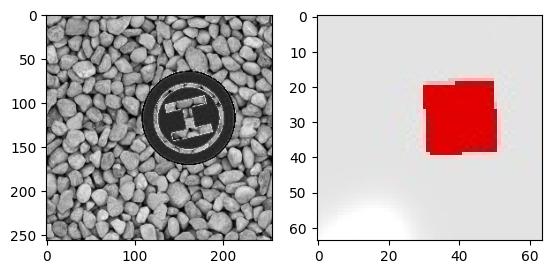

In [185]:
random_texture_index = np.random.uniform(0, 100, 1)
random_index = np.random.uniform(0, 30000, 1)
random_texture_index = int(random_texture_index)
random_index = int(random_index)
img_texture = Image.open('Dataset/texture/{}.png'.format(random_texture_index))
img_land = Image.open('Dataset/land2/{}.jpg'.format(random_index))
img_texture = np.array(img_texture)
img_land = np.array(img_land)
# plt.imshow(img_texture)
# img_mix_land = np.where(img_land[:, :, 0] > 200, img_texture, img_land)
img_mix_index = np.where(img_land[:, :, 2] > 200)
img_land[img_mix_index[0], img_mix_index[1],  :] = img_texture[img_mix_index[0],  img_mix_index[1],  :]
# img_land = fil.apply(img_land)
img_land = img_land/255
img_land = 0.9*img_land[:,:,2]+0.05*img_land[:,:,0]+0.05*img_land[:,:,1]
img_label = Image.open('Dataset/label2/{}.jpg'.format(str(random_index)))
img_label = np.array(img_label)
print(random_index)
# print(img_mix_index)
plt.subplot(121)
plt.imshow(img_land, cmap='gray')
plt.subplot(122)
plt.imshow(img_label)

# Batch processing

In [274]:
def plot_dual(img_as, img_bs, cmap=None):
    """ plot dual imgs, left is proceessing img, 
        right is origin img.

    Args:
        img_as (list): 1xwxhxchannel
        img_bs (list): 
    """
    length = len(img_as)

    cols = length

    for i in range(length):
        plt.subplot(cols,2,2*i+1)
        plt.imshow(img_as[i][0], cmap=cmap)
        plt.subplot(cols,2,2*i+2)
        plt.imshow(img_bs[i][0], cmap=cmap)

def add_texture(img,texture):
    change_index = np.where(img[:, :, 2] > 200)
    img[change_index[0], change_index[1],:] = texture[change_index[0], change_index[1],:]
    return img

def gray_scale_img(img):
    img = img/255
    img = 0.9*img[:,:,2]+0.05*img[:,:,0]+0.05*img[:,:,1]
    return img

def get_batch_data(batch):
    batch_index = np.random.uniform(0,30000,batch)
    batch_index = batch_index.astype(np.int32)

    batch_texture_index = np.random.uniform(0,100,batch)
    batch_texture_index = batch_texture_index.astype(np.int32)

    # print(batch_index)

    features = []
    labels = []
    for i, value in enumerate(batch_index):
        # print(value)
        feature = Image.open('Dataset/land2/{}.jpg'.format(value))
        label = Image.open('Dataset/label2/{}.jpg'.format(value))
        texture = Image.open('Dataset/texture/{}.png'.format(batch_texture_index[i]))

        feature = np.array(feature)
        label = np.array(label)
        texture = np.array(texture)

        feature = add_texture(feature, texture)
        feature = gray_scale_img(feature)

        label = label[:,:,2]/255

        features.append(np.expand_dims(feature, axis=0))
        labels.append(np.expand_dims(label, axis=0))
    
    return features, labels

In [325]:
features, labels = get_batch_data(256)

# plot_dual(features, labels, 'gray')
